# **Jupyter notebook (Caracterización de redes y topologías biológicas)**
Autores: **Diego Mañanes Cayero** y **Alejandro Martín Muñoz**

## **Práctica 2: Gráfos Aleatorios, Regulares, de Mundo pequeño y libres de escala**

### 1. Estudiar las propiedeades de un grafo aleatorio.

**a. Usando la función ``gnp_random_graph(n,p)`` de NetworkX, implementad una rutina Python ``L_C_Aleatorio`` que devuelva el valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) de un conjunto de n_graph grafos aleatorios de n nodos y probabilidad p.** El formato de la función debe ser:

``[l,c] = L_C_Aleatorio(n_graph,n,p)``

In [49]:
# importación de librerías
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pickle
import os.path
import string

* Definir K exactamente y explicar por qué puede ser interesante coger dicho valor (su media). 
* Explicar los diferentes pasos y por qué cogemos n-1 cuando el grafo no es conexo. 

La función ``L_C_Aleatorio`` se ha construido de manera que no solo devuelve los valores de C y L, sino también el grado medio (K) de cada uno de los grafos generados. 

In [2]:
# Definición de la función
def L_C_Aleatorio(n_graph, n, P):
    C = []
    L = []
    K = []
    for graph in range(n_graph):
        G = nx.gnp_random_graph(n, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        Degree = dict(nx.degree(G)).values()
        K.append(sum(Degree)/len(Degree))
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), round(sum(K)/len(K), 3)

**b. Usando la rutina anterior, dibujar el comportamiento de L, C para distintos valores de la probabilidad p y un número fijo de nodos.** 

* Tomad n=400, n_graph=20 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

* Dibujad una gráfica que describa el comportamiento de estos dos parámetros como función de p, usad escala logarítmica en el eje x.

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?

En primer lugar, se lleva a cabo la simulación de 20 grafos aleatorios para cada una de las probabilidades dadas mediante función ``L_C_Aleatorio``. Dicha función devolverá una tupla con la media de L, C y K para los 20 grafos. Dado que los tiempos de ejecución son extensos, se ha decido guardar los resultados en ficheros binarios mediante el módulo ``pickle`` de la librería estándar de Python con el protocolo establecido por defecto. 

In [3]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_random_metrics.pkl"):
    with open("G_random_metrics.pkl", "rb") as file:
        G_random_metrics = pickle.load(file)
else:    
    C_results_1 = []
    L_results_1 = []
    K_results_1 = []
    for P in Probs:
        Indiv_results_1 = L_C_Aleatorio(20, 400, P)
        C_results_1.append(Indiv_results_1[1])
        L_results_1.append(Indiv_results_1[0])
        K_results_1.append(Indiv_results_1[2])

    G_random_metrics = [C_results_1, L_results_1, K_results_1]
    
    with open("G_random_metrics.pkl", "wb") as file:
        pickle.dump(G_random_metrics, file, -1)

A continuación, se generan los gráficos correspondientes para el estudio del comportamiento de los parámetros en función de los distintos valores de p. Cabe destacar que el gráfico D se corresponde con el comportamiento de C y L mostrado de forma conjunta. Dado que el rango de valores en el que se distribuyen los dos parámetros es diferente, se han reescalado los valores de L para que su rango de valores vaya de 0 a 1 mediante la división de los mismos por el máximo, siendo en este caso 400 (número de nodos).

**Quitar ax.axhline(1), pensar si meter un gráfico con zoom**

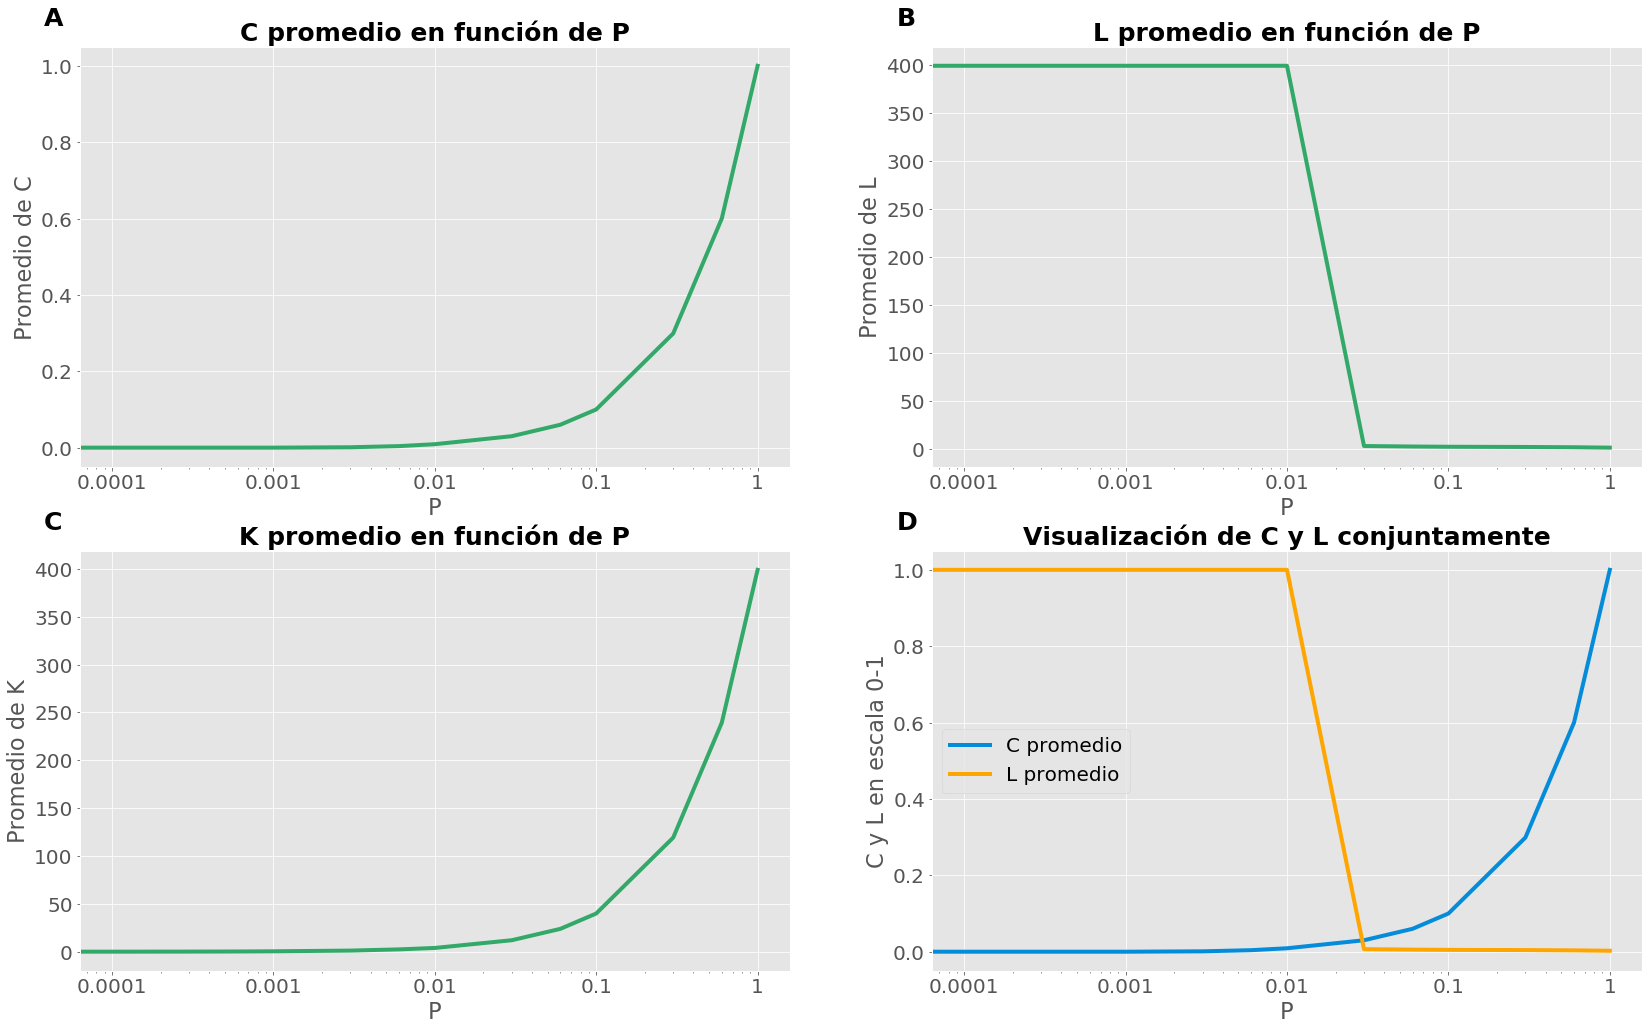

In [96]:
G_titles = ["C promedio en función de P", "L promedio en función de P", 
            "K promedio en función de P", "Visualización de C y L conjuntamente"]
G_ylabels = ["Promedio de C", "Promedio de L", "Promedio de K", "C y L en escala 0-1"]
textSize = 25
lineW = 4

# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_random_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_random_metrics[0], linewidth = lineW, color = "#048bd9", label = "C promedio")
        ax.plot(Probs, np.array(G_random_metrics[1])/max(G_random_metrics[1]), linewidth = lineW,
                color = "orange", label = "L promedio")
        ax.legend(loc = "best", prop = {'size': textSize * 0.8})
#     if nax == 2:
#         ax.axhline(1)
#         ax.set_xlim(0.00001, 0.1)
#         ax.set_ylim(0, 10)
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    

* **Lo que pongo en negrita es porque lo tengo que revisar**

En base a estos gráficos, podemos determinar la probabilidad crítica ($P_c$) a la que los parámetros L y C varían su comportamiento en grafos aleatorios con 400 nodos, ya que P depende de N. $P$ es la probabilidad con la que existen ramas en el grafo, de forma que si $P = 0$, el grafo será completamente disconexo, ya que no existirá ninguna rama; mientras que si $P = 1$, el grafo será conexo, **ya que existirán todas las posibles ramas entre los nodos.**  De hecho, en esa situación el grafo será regular, ya que todos los nodos tendrán el mismo grado (mirar distribución de grados a continuación).

Teniendo en cuenta estas premisas, podemos interpretar los gráficos como la transición desde un grafo sin ninguna componente conexa (sin ninguna rama) en el que $C = 0$ y L tiende a infinito (por facilitar la visualización, establecemos para grafos disconexos $L = N - 1$), hasta un grafo en el que todos los nodos están conectados por el número máximo de ramas y, por tanto, presenta $C = 1$, ya que será un único clúster hiperconectado; y $L = 1$, ya que desde un nodo a cualquier otro la distancia siempre será 1 (mirar Ecuación 1).

**quitar o ver cómo meterlo bien: mediante la expresión $L = \frac{mean(distancias)}{N-1}$**

$$
\begin{cases}
    K = 0, & C = 0, & L = N - 1, & \text{if } P = 0\\
    K = N - 1, & C = 1, & L = 1, & \text{if } P = 1
\end{cases}
\tag{1}
$$

siendo $N$ el numero de nodos del grafo, en este caso 400. 

**La primera línea del chunk podría ir aquí y meter una intro distinta arriba**

Respecto a la probabilidad crítica, podemos observar cómo el comportamiento de C comienza a cambiar con $P_c = 0.01$ $(10^{-2})$, creciendo de forma más acentuada a partir de $P_c = 0.1$ $(10^{-1})$. L disminuye drásticamente a partir de  $P_c = 0.01$ $(10^{-2})$, llegando a establecerse cerca de 1 cuando $P \approx 0.05$. Por lo tanto, a estos valores de $P_c$ ambos parámetros sufren un cambio drástico en su evolución, lo cual tiene implicaciones relevantes en la estructura del grafo. 

**Diapositiva 11**

También es importante estudiar el comportamiento de K con respecto a P. Como podemos observar, la evolución de K es exactamente la misma a la de C, lo cual es lógico por el **hecho de que ambos están midiendo lo mismo en escalas distintas**: dado que conforme aumenta P el número de ramas aumenta, tanto K como C serán mayores y presentarán la misma curva de crecimiento. Con $P=0.01$ podemos observar que tanto grado medio de los nodos como el índice de clusterización comienzan a aumentar exponencialmente, lo que significa que para dicho valor de P se comienza a generar un único cluster, es decir, pasará a ser un grafo conexo, que acabará teniendo el mismo tamaño que el tamaño máximo del grafo ($N - 1$). Para valores menores de P, el grafo estará compuesto por clústeres de orden $N - n$ donde $n$ es el número de ramas, es decir, estará segmentado en $N - n$ subgrafos. 

Desde otra perspectiva, dado que podemos relacionar P con K obteniendo la siguiente expresión: $P = \frac{K}{N-1}$, siendo P el cociente de la normalización del grado medio entre el número máximo de grado posible, podemos determinar a partir de qué valor de K el índice de clusterización comienza a cambiar de forma exponencial. Como podemos observar en el siguiente gráfico, dicho valor es aproximadamente 1, por lo que, en el momento en el que **aparece la primera rama | no sé si es así, porque es promedio de K**, se comienza a generar un único clúster.


En base a estos valores y dado que sabemos que los grafos aleatorios se dan cuando tanto L como C presentan valores bajos, el rango de valores de P en los que encontramos un grafo aleatorio conexo se da entre 0.05 y 0.1. Para determinar con precisión para qué valores encontramos 

In [ ]:
#     if nax == 2:
#         ax.axhline(1)
#         ax.set_xlim(0.00001, 0.1)
#         ax.set_ylim(0, 5)

In [31]:
for i in Probs:
    print(i, ":", nx.is_connected(nx.gnp_random_graph(400, i)))
G_AL_1 = nx.gnp_random_graph(400, 1)

0 : False
0.0001 : False
0.0003 : False
0.0006 : False
0.001 : False
0.003 : False
0.006 : False
0.01 : False
0.03 : True
0.06 : True
0.1 : True
0.3 : True
0.6 : True
1.0 : True


<BarContainer object of 400 artists>

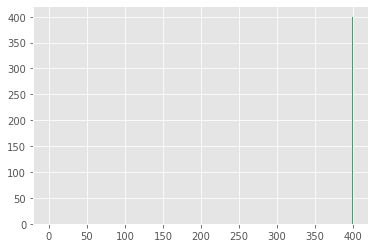

In [30]:
D = nx.degree_histogram(G_AL_1)
plt.bar(range(len(D)), D, color = "#32a869")

### 2. Redes regulares y de mundo pequeño

**a. Usando la función de NetworkX ``watts_strogatz_graph(n, k, p)`` implementad una rutina Python ``L_C_small_world(n_graph, n, k, p)`` que devuelva valor promedio de los coeficientes C (índice de clusterización promedio) y L (camino característico) para un conjunto de n_graph grafos de tipo Small World.** El formato de la función debe ser:

`` [l,c] = L_C_Small_World(n_graph,n,k,p)``

Nota: En el caso de que el grafo no sea conexo, usad el valor n-1 para L en ese grafo.

Al igual que en el caso anterior, la función no solo devuelve los valores de C y L, sino también los de K, aunque en este caso es uno de los parámetros necesarios para la función ``watts_strogatz_graph`` y, por tanto, es introducido por el usuario. Dicha función parte de un grafo regular con un número de nodos y ramas especificado y, en función de P (probabilidad de cambiar de posición cada una de las ramas), la posición de éstas varía siguiendo una distribución aleatoria. Con esta función no nos aseguramos que los grafos resultantes sean conexos, razón por la cual se decide coger $L = n - 1$ en estos casos y, además, el número de ramas inicial se mantiene constante. 

In [5]:
def L_C_Small_World(n_graph, n, k, P):
    C = []
    L = []
    for graph in range(n_graph):
        G = nx.watts_strogatz_graph(n, k, P)
        C.append(nx.average_clustering(G))
        # Cuando el grafo es conexo, se puede usar la función de cálculo del camino característico pero, cuando
        # no, L = n - 1 porque es el valor máximo de camino característico.
        if nx.is_connected(G):
            L.append(nx.average_shortest_path_length(G))
        else:
            L.append(n - 1)
        
    return round(sum(L)/len(L), 3), round(sum(C)/len(C), 3), k

**b. Usando la rutina anterior, generad una gráfica con el comportamiento de C y L para distintos valores de la probabilidad p y un número fijo de nodos y ramas.** 

* Tomad N=400, k=8 y los siguientes valores de p: [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.].

* ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C? ¿Entre que valores de p dirías que está la zona de Small-World para estos valores de N y k. ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

* Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.

* Con los datos que obtuviste en la práctica 1. ¿Dirías que la red de interacción de proteínas del Caernobidis Elegans puede ser considerada una red de mundo pequeño? Razona la respuesta.

In [6]:
Probs = [0, 0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1.]

if os.path.isfile("G_SW_metrics.pkl"):
    with open("G_SW_metrics.pkl", "rb") as file:
        G_SW_metrics = pickle.load(file)
else:    
    C_results_2 = []
    L_results_2 = []
    K_results_2 = []
    for P in Probs:
        Indiv_results_2 = L_C_Small_World(20, 400, 8, P)
        C_results_2.append(Indiv_results_2[1])
        L_results_2.append(Indiv_results_2[0])
        K_results_2.append(Indiv_results_2[2])
    
    G_SW_metrics = [C_results_2, L_results_2, K_results_2]
    
    with open("G_SW_metrics.pkl", "wb") as file:
        pickle.dump(G_SW_metrics, file, -1)

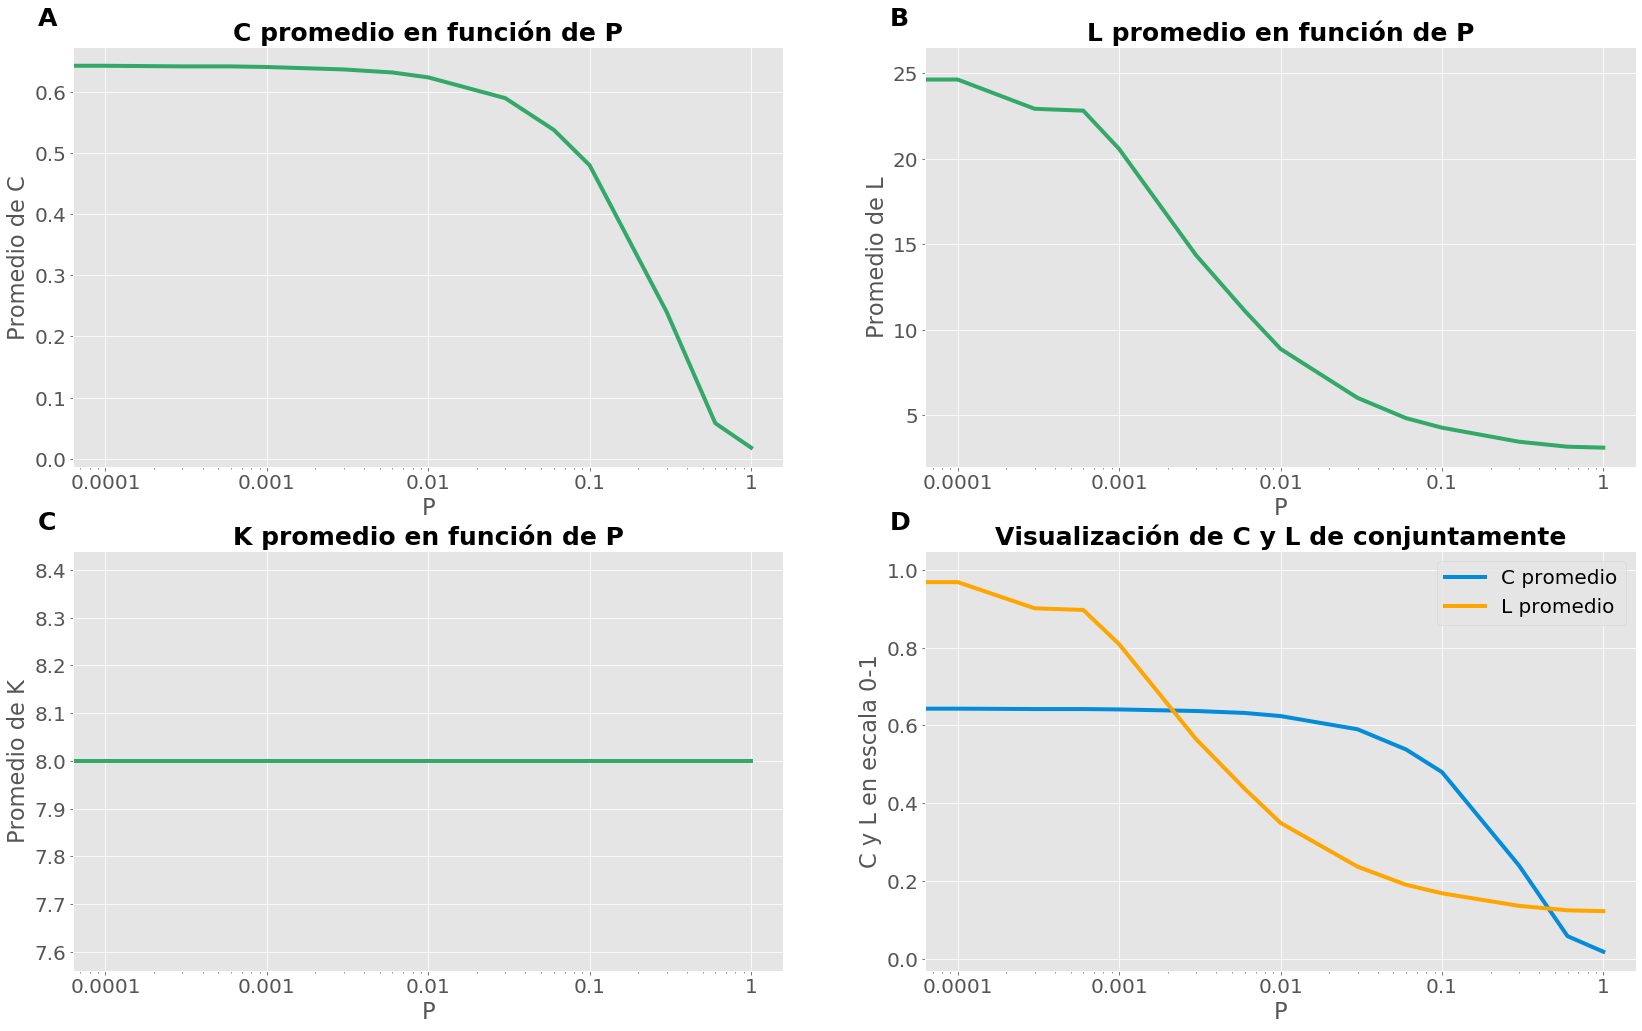

In [83]:
# Representación 
fig, axs = plt.subplots(2, 2, figsize = (28, 17))

for nax, ax in enumerate(axs.flat):
    if nax != 3:
        ax.plot(Probs, G_SW_metrics[nax], linewidth = lineW, color = "#32a869")
    else:
        ax.plot(Probs, G_SW_metrics[0], linewidth = lineW, color = "#048bd9", label = "C promedio")
        ax.plot(Probs, np.array(G_SW_metrics[1])/max(G_SW_metrics[1]), linewidth = lineW, 
                color = "orange", label = "L promedio")
        ax.legend(loc = "best", prop = {'size': textSize * 0.8})
    ax.set_title(G_titles[nax], fontweight = "bold", fontsize =  textSize)
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes, size = textSize + 0.2,
            weight = 'bold')
    ax.set_ylabel(G_ylabels[nax], fontsize = textSize * 0.9)
    ax.set_xlabel("P", fontsize = textSize * 0.9)
    ax.set_xscale("log", nonposx = 'clip')
    ax.tick_params(labelsize = textSize * 0.8)
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))

Como se puede observar en la primera gráfica, el comportamiento de C cambia para $P = 0.01$ $(10^{-1})$.
Como se puede observar en la segunda gráfica, el comportamiento de L cambia para $P = 0.001$ $(10^{-3})$.

Por otro lado, se cumple el comportamiento teórico esperado para las redes de mundo pequeño: en cuanto P aumenta un poco, el camino característico baja mucho, mientras que el índice de clusterización se mantiene y cae con valores de P mayores.

La **zona de mundo pequeño** se define como aquella en la que C es más o menos igual que en un grafo regular y L es más o menos igual que en un grafo aleatorio. Otra definición es aquella zona en la que hay una clusterización alta y un camino característico bajo. De acuerdo a estas definiciones y a la visualización de la evolución de los parámetros C y L de forma conjunta (gráfica D), se podría decir que la zona de mundo pequeño es aquella ubicada aproximadamente entre los valores de $P = 10^{-3}$ y $P = 10^{-1}$.

El valor teórico de P para el cual se produce la transición de L es P = 1 / kN = 1 / (8·400) = 0.0003125 = $10^{-3.505}$. Como se ha dicho previamente, el cambio de comportamiento de L más drástico se produce a un valor de P = $10^{-3}$, de forma que el valor teórico y el observado son muy parecidos.

Respecto a la comparación de las gráficas obtenidas con las teóricas (diapositiva 36 del tema "Grafos aleatorios, grafos regulares y redes de mundo pequeño"), hay que destacar que son muy parecidas, si bien en las teóricas el camino característico cae antes y se parte de un índice de clusterización más alto.

Respecto a la red de Caernobidis Elegans, su C era de 0.075708 y, al no ser dirigido, su L sería de 1386. De acuerdo a estos valores y a lo observado en las gráficas teóricas y de estudio, yo creo que no se trataría de una red de mundo pequeño.

### 3. Redes libres de Escala

**a. Generad una red libre de escala con 10000 nodos y que añade 10 nodos en cada paso (utilizad la rutina barabasi_albert_graph(n, m)).** Calculad los valores de L, C y la distribución de grado de los nodos. Generad una red aleatoria que tenga el mismo número de nodos y ramas que la red que habéis creado, calculad sus valores de L, C y la distribución del grado de los nodos y comparad los valores obtenidos.

In [8]:
if os.path.isfile("G_SF_metrics.pkl"):
    with open("G_SF_metrics.pkl", "rb") as file:
        G_SF_metrics = pickle.load(file)
else:
    G_SF = nx.barabasi_albert_graph(10000, 10)
    C_SF = nx.average_clustering(G_SF)
    L_SF = nx.average_shortest_path_length(G_SF)
    m_SF = nx.number_of_edges(G_SF)
    Degree_dist_SF = nx.degree_histogram(G_SF)
    
    G_SF_metrics = [C_SF, L_SF, m_SF, Degree_dist_SF]
    
    with open("G_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_SF_metrics, file, -1)

In [9]:
if os.path.isfile("G_random_SF_metrics.pkl"):
    with open("G_random_SF_metrics.pkl", "rb") as file:
        G_random_SF_metrics = pickle.load(file)
else:
    G_AL = nx.gnm_random_graph(10000, G_SF_metrics[2])
    C_AL = nx.average_clustering(G_AL)
    L_AL = nx.average_shortest_path_length(G_AL)
    Degree_dist_AL = nx.degree_histogram(G_AL)
    
    G_random_SF_metrics = [C_AL, L_AL, Degree_dist_AL]
    
    with open("G_random_SF_metrics.pkl", "wb") as file:
        pickle.dump(G_random_SF_metrics, file, -1)


 Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la aleatoria 
 equivalente.


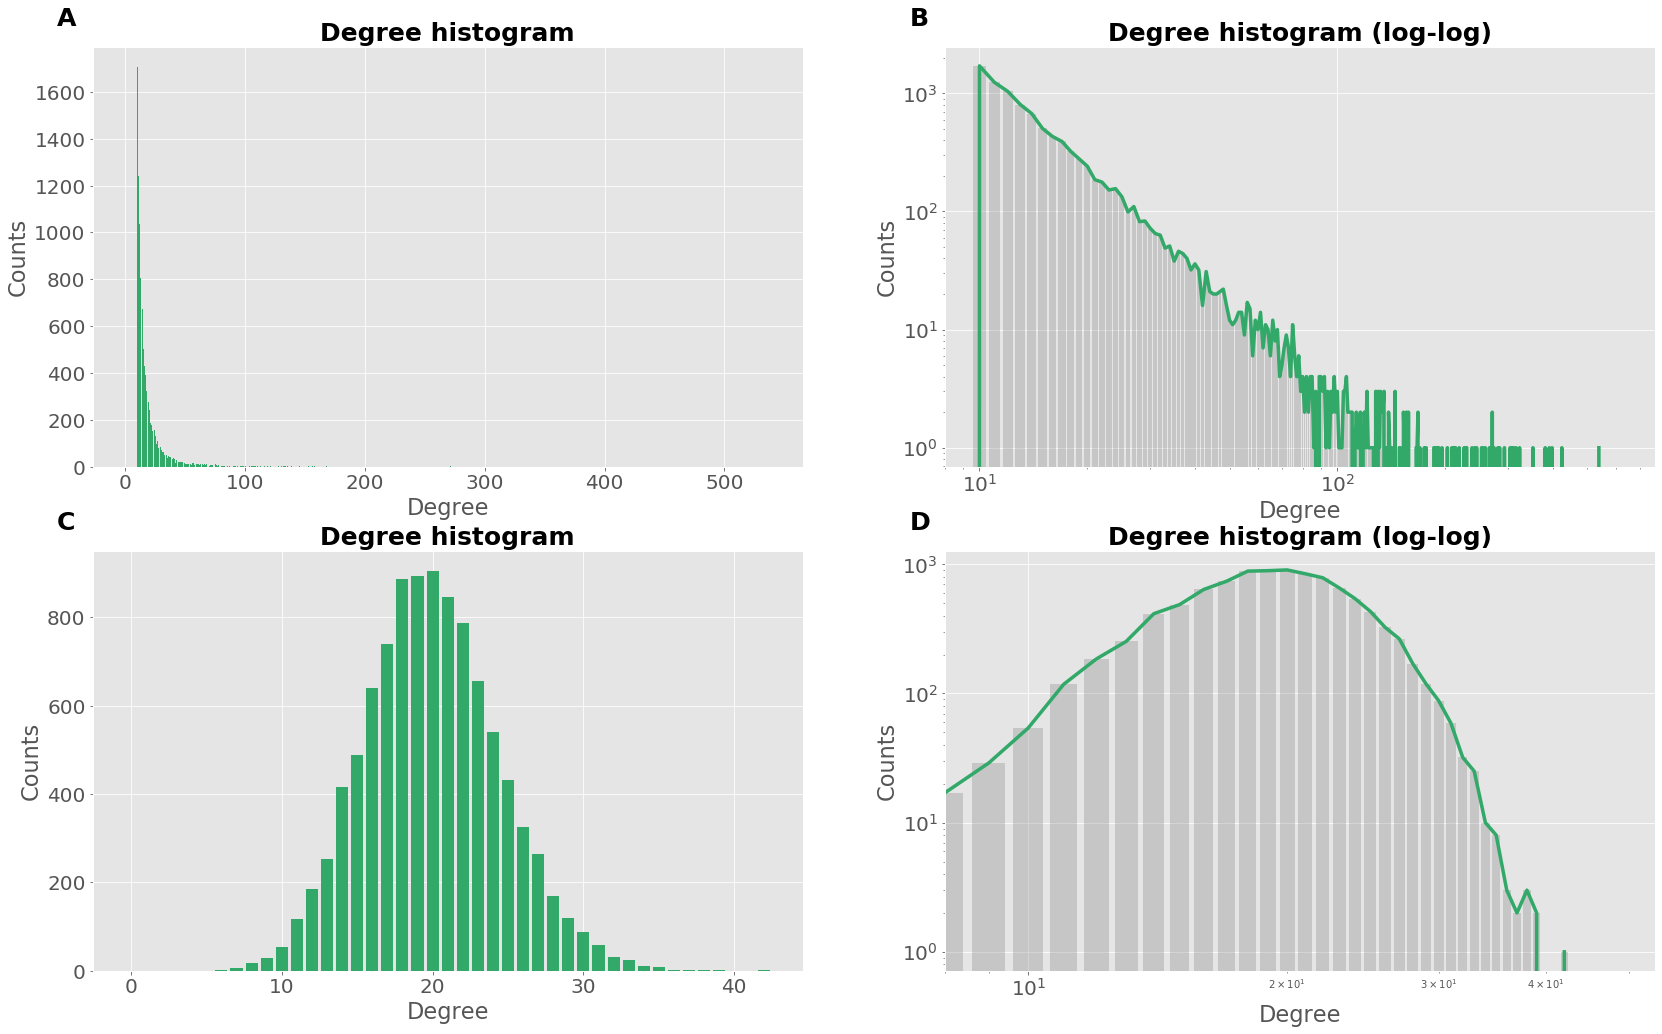

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (28, 17))
textSize = 25
lineW = 3.5

Degree_dists = [G_SF_metrics[3], G_SF_metrics[3], G_random_SF_metrics[2], G_random_SF_metrics[2]]

print("\n Las gráficas A y B corresponden a la red libre de escala, mientras que las C y D corresponden a la",
      "aleatoria \n equivalente.")

for nax, ax in enumerate(axs.flat):
    if (nax == 0) or (nax == 2):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "#32a869")
        ax.set_title("Degree histogram", fontweight = "bold", fontsize =  textSize)
    elif (nax == 1) or (nax == 3):
        ax.bar(range(len(Degree_dists[nax])), Degree_dists[nax], color = "grey", alpha = 0.3)
        ax.plot(range(len(Degree_dists[nax])), Degree_dists[nax], linewidth = lineW, color = "#32a869")
        ax.set_title("Degree histogram (log-log)", fontweight = "bold", fontsize =  textSize)
        ax.set_xscale("log", nonposx='clip')
        ax.set_yscale("log", nonposy='clip')
        ax.set_xlim(8)
    
    ax.text(-0.05, 1.05, string.ascii_uppercase[nax], transform = ax.transAxes,
            size = textSize + 0.2, weight = 'bold')
    ax.set_ylabel("Counts", fontsize = textSize * 0.9)
    ax.set_xlabel("Degree", fontsize = textSize * 0.9)  
    ax.tick_params(labelsize = textSize * 0.8)

In [11]:
print("El índice de clusterización de la red libre de escala creada es:", G_SF_metrics[0])
print("El camino característico de la red libre de escala creada es:", G_SF_metrics[1], "\n")
print("El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[0])
print("El camino característico de la red aleatoria equivalente a la libre de escala creada es:",
      G_random_SF_metrics[1])

El índice de clusterización de la red libre de escala creada es: 0.010585222161397909
El camino característico de la red libre de escala creada es: 3.0729635163516353 

El índice de clusterización de la red aleatoria equivalente a la libre de escala creada es: 0.0018992100687198932
El camino característico de la red aleatoria equivalente a la libre de escala creada es: 3.4032812681268125


El índice de clusterización de la red libre de escala es un orden de magnitud mayor que el de la red aleatoria equivalente, de forma que hay un sesgo en la misma; mientras que el camino característico es es más pequeño. Las propiedades de las redes libres de escala son: camino característico corto, incluso más que en el grafo aleatorio equivalente; índice de clusterización pequeño y decreciente (a mayor número de nodos). Ambas propiedades se cumplen en el caso de la red libre de escala creada (comparada con la aleatoria equivalente).